let's try loading in our data.

In [33]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import numpy as np

# Show all columns (adjust to 1000 or higher if needed)
#pd.set_option('display.max_columns', None)     # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Don't wrap DataFrame across lines

now let's do breast cancer: "https://xenabrowser.net/datapages/?cohort=GDC%20TCGA%20Breast%20Cancer%20(BRCA)&removeHub=https%3A%2F%2Fxena.treehouse.gi.ucsc.edu%3A443"

In [34]:
breast_path = "/Users/tirdodbehbehani/Desktop/BSE/Term 3/Thesis/master_thesis_git/data/BREAST"
#breast_path = "C:/Users/elisa/OneDrive/Desktop/Thesis/master_thesis/data/BREAST"
#breast_path="/Users/inigo/Downloads/DATA/BREAST"

In [35]:
# Adjust the filename if you're using FPKM-UQ
breast_gene_expression_path = os.path.join(breast_path, "TCGA-BRCA.star_tpm.tsv.gz")
breast_gene_expression = pd.read_csv(breast_gene_expression_path, sep='\t', index_col=0)

# Inspect the data
breast_gene_expression.head()

,TCGA-D8-A146-01A,TCGA-AQ-A0Y5-01A,TCGA-C8-A274-01A,TCGA-BH-A0BD-01A,TCGA-B6-A1KC-01B,TCGA-AC-A62V-01A,TCGA-AO-A0J5-01A,TCGA-BH-A0B1-01A,TCGA-A2-A0YM-01A,TCGA-AO-A03N-01B,...,TCGA-E2-A1IG-01A,TCGA-E9-A1NA-01A,TCGA-D8-A1JP-01A,TCGA-AR-A252-01A,TCGA-D8-A1XL-01A,TCGA-BH-A0EI-01A,TCGA-E2-A1IO-01A,TCGA-E2-A15R-01A,TCGA-B6-A0IP-01A,TCGA-A1-A0SN-01A
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,5.662037,3.703721,6.514515,4.784917,4.251984,3.536849,4.645690,6.021755,6.260931,3.613025,...,4.825501,4.142806,4.960919,4.770121,5.276757,6.436490,6.184500,2.670931,6.834395,3.650719
ENSG00000000005.6,3.376096,0.463099,0.000000,2.328061,0.435415,0.736475,1.255622,0.392647,0.467593,0.000000,...,0.134747,0.159500,0.079566,3.312418,0.000000,0.383608,0.755144,0.479644,0.526069,0.059909
ENSG00000000419.13,6.860140,7.086452,6.805072,6.443071,6.178436,6.823355,5.749910,6.977449,6.819887,6.079559,...,6.382933,6.436308,6.994589,6.005000,7.382161,7.220846,6.868277,7.033110,6.384368,8.153019
ENSG00000000457.14,4.400552,4.051007,5.037264,4.374970,3.558464,2.108324,4.487107,4.021000,3.319560,2.287502,...,3.891448,3.765057,4.946796,3.648707,3.664915,3.752192,4.093078,4.831796,4.368028,4.172247
ENSG00000000460.17,2.845169,2.426989,4.043248,4.162790,2.589548,2.277777,2.545178,3.372492,4.023974,1.753177,...,2.557655,2.566596,3.746915,2.494160,3.104957,3.111549,2.538538,3.730901,3.311721,3.301075


In [36]:
breast_survival_path = os.path.join(breast_path, "TCGA-BRCA.survival.tsv.gz")
breast_survival = pd.read_csv(breast_survival_path, sep='\t')

# Inspect
breast_survival.head()

,sample,OS.time,OS,_PATIENT
0,TCGA-C8-A275-01A,1.0,0,TCGA-C8-A275
1,TCGA-AC-A7VC-01A,1.0,0,TCGA-AC-A7VC
2,TCGA-BH-A1F8-01A,1.0,1,TCGA-BH-A1F8
3,TCGA-BH-A1F8-11B,1.0,1,TCGA-BH-A1F8
4,TCGA-PL-A8LX-01A,5.0,0,TCGA-PL-A8LX


In [37]:
breast_pheno_path = os.path.join(breast_path, "TCGA-BRCA.clinical.tsv.gz")
breast_phenotype = pd.read_csv(breast_pheno_path, sep='\t')

# Inspect
breast_phenotype.head()

,sample,id,disease_type,case_id,submitter_id,primary_site,alcohol_history.exposures,race.demographic,gender.demographic,ethnicity.demographic,...,days_to_collection.samples,initial_weight.samples,preservation_method.samples,pathology_report_uuid.samples,oct_embedded.samples,specimen_type.samples,days_to_sample_procurement.samples,is_ffpe.samples,tissue_type.samples,annotations.samples
0,TCGA-BH-A0W3-01A,3c612e12-6de8-44fa-a095-805c45474821,Ductal and Lobular Neoplasms,3c612e12-6de8-44fa-a095-805c45474821,TCGA-BH-A0W3,Breast,Not Reported,white,female,not hispanic or latino,...,85.0,120.0,OCT,801A4E2F-E26E-424F-BF42-CD0D9CD62BCE,True,Solid Tissue,NaN,False,Tumor,NaN
1,TCGA-AR-A24V-01A,3cb06c7a-f2a8-448b-91a8-dd201bbf2ddd,Ductal and Lobular Neoplasms,3cb06c7a-f2a8-448b-91a8-dd201bbf2ddd,TCGA-AR-A24V,Breast,Not Reported,white,female,not hispanic or latino,...,1720.0,400.0,OCT,468CD293-C9F7-43C6-A40A-18FCDD22F6AA,True,Solid Tissue,NaN,False,Tumor,NaN
2,TCGA-E9-A1NE-01A,3d676bba-154b-4d22-ab59-d4d4da051b94,Ductal and Lobular Neoplasms,3d676bba-154b-4d22-ab59-d4d4da051b94,TCGA-E9-A1NE,Breast,Not Reported,white,female,not hispanic or latino,...,31.0,280.0,OCT,CF6E29A2-FAE6-45BB-B625-33877887A89E,True,Solid Tissue,NaN,False,Tumor,NaN
3,TCGA-E9-A1NE-11A,3d676bba-154b-4d22-ab59-d4d4da051b94,Ductal and Lobular Neoplasms,3d676bba-154b-4d22-ab59-d4d4da051b94,TCGA-E9-A1NE,Breast,Not Reported,white,female,not hispanic or latino,...,31.0,830.0,OCT,NaN,True,Solid Tissue,NaN,False,Normal,NaN
4,TCGA-AC-A8OQ-01A,dfaabd03-2d40-4422-b210-caf112ff4229,Ductal and Lobular Neoplasms,dfaabd03-2d40-4422-b210-caf112ff4229,TCGA-AC-A8OQ,Breast,Not Reported,black or african american,female,not hispanic or latino,...,742.0,100.0,Unknown,FFA6F9F3-71C1-4AF9-B9F7-0466550EBC90,False,Solid Tissue,NaN,False,Tumor,NaN


In [38]:
# Transpose the liver_gene_expression matrix so that sample IDs are columns
breast_gene_expression_transposed = breast_gene_expression.T  # Sample IDs become columns

# Now, rename the index to 'sample_id' (assuming the index is the sample_id after transposition)
breast_gene_expression_transposed.reset_index(inplace=True)
breast_gene_expression_transposed.rename(columns={'index': 'sample'}, inplace=True)

# Merge the transposed gene expression dataframe with the liver_survival and liver_phenotype dataframes
breast_combined_df = breast_gene_expression_transposed.merge(breast_survival, on='sample', how='inner') \
                                                   .merge(breast_phenotype, on='sample', how='inner')

# Display the shape of the combined dataframe
print(f"Combined breast dataframe shape: {breast_combined_df.shape}")

Combined breast dataframe shape: (1203, 60748)


In [39]:
breast_combined_df.head()

,sample,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,...,days_to_collection.samples,initial_weight.samples,preservation_method.samples,pathology_report_uuid.samples,oct_embedded.samples,specimen_type.samples,days_to_sample_procurement.samples,is_ffpe.samples,tissue_type.samples,annotations.samples
0,TCGA-D8-A146-01A,5.662037,3.376096,6.860140,4.400552,2.845169,3.579965,4.996181,5.614683,4.385652,...,221.0,230.0,Unknown,79749F5D-329A-400D-8511-C4CF479C1FCC,False,Solid Tissue,NaN,False,Tumor,NaN
1,TCGA-AQ-A0Y5-01A,3.703721,0.463099,7.086452,4.051007,2.426989,2.322361,4.943860,6.539078,4.046404,...,212.0,160.0,Unknown,5BC01981-366E-44EC-A986-087DB7904E5C,False,Solid Tissue,NaN,False,Tumor,NaN
2,TCGA-C8-A274-01A,6.514515,0.000000,6.805072,5.037264,4.043248,2.124130,2.993348,5.119912,3.409907,...,163.0,470.0,OCT,A7FAA4F2-1846-48CF-9FB5-15E98430F6CE,True,Solid Tissue,NaN,False,Tumor,NaN
3,TCGA-BH-A0BD-01A,4.784917,2.328061,6.443071,4.374970,4.162790,3.122375,4.754674,5.608738,3.625691,...,364.0,90.0,OCT,CE70DD1E-BCA4-4F89-AA5B-D90FE18A36FF,True,Solid Tissue,NaN,False,Tumor,NaN
4,TCGA-B6-A1KC-01B,4.251984,0.435415,6.178436,3.558464,2.589548,1.508581,3.722149,5.224044,3.242221,...,2781.0,50.0,OCT,E1FDF8EB-9D75-4629-9C78-6019DAF8190E,True,Solid Tissue,NaN,False,Tumor,NaN


In [40]:
print("\nBreast Cancer DataFrames:")
print("Gene Expression Shape:", breast_gene_expression.shape)
print("Survival Shape:", breast_survival.shape)
print("Phenotype Shape:", breast_phenotype.shape)


Breast Cancer DataFrames:
Gene Expression Shape: (60660, 1226)
Survival Shape: (1232, 4)
Phenotype Shape: (1255, 85)


----------------------------

BREAST CANCER

In [41]:
# Print the list of columns in the breast_combined_df DataFrame
print(breast_combined_df.columns.to_list())

# Select only the columns that start with 'ENSG' (gene identifiers)
genes_only = breast_combined_df.loc[:, breast_combined_df.columns.str.startswith('ENSG')]

# Create a gene summary DataFrame with descriptive statistics for each gene
gene_summary = pd.DataFrame({
    'mean': genes_only.mean(),
    'median': genes_only.median(),
    'std': genes_only.std(),
    'min': genes_only.min(),
    'max': genes_only.max(),
    'non_zero_count': (genes_only > 0).sum(),
    'zero_frac': (genes_only == 0).sum() / genes_only.shape[0],
    'missing_frac': genes_only.isna().mean()
})

# Print the first few rows of the gene summary and the shape of the genes_only DataFrame
print(gene_summary.head())
print(genes_only.shape)


['sample', 'ENSG00000000003.15', 'ENSG00000000005.6', 'ENSG00000000419.13', 'ENSG00000000457.14', 'ENSG00000000460.17', 'ENSG00000000938.13', 'ENSG00000000971.16', 'ENSG00000001036.14', 'ENSG00000001084.13', 'ENSG00000001167.14', 'ENSG00000001460.18', 'ENSG00000001461.17', 'ENSG00000001497.18', 'ENSG00000001561.7', 'ENSG00000001617.12', 'ENSG00000001626.16', 'ENSG00000001629.10', 'ENSG00000001630.17', 'ENSG00000001631.16', 'ENSG00000002016.18', 'ENSG00000002079.14', 'ENSG00000002330.14', 'ENSG00000002549.12', 'ENSG00000002586.20', 'ENSG00000002586.20_PAR_Y', 'ENSG00000002587.10', 'ENSG00000002726.21', 'ENSG00000002745.13', 'ENSG00000002746.15', 'ENSG00000002822.15', 'ENSG00000002834.18', 'ENSG00000002919.15', 'ENSG00000002933.9', 'ENSG00000003056.8', 'ENSG00000003096.14', 'ENSG00000003137.8', 'ENSG00000003147.19', 'ENSG00000003249.15', 'ENSG00000003393.15', 'ENSG00000003400.15', 'ENSG00000003402.20', 'ENSG00000003436.16', 'ENSG00000003509.16', 'ENSG00000003756.17', 'ENSG00000003987.14'

In [42]:
# Identify the columns that are gene IDs (those starting with "ENSG")
gene_columns = breast_combined_df.columns[breast_combined_df.columns.str.startswith('ENSG')]

# Update the column names by removing the version number after the gene ID
breast_combined_df.rename(columns={col: col.split('.')[0] for col in gene_columns}, inplace=True)

#(Different datasets may use different versions of gene annotations. Removing .15 makes it easier to merge or compare across datasets.)
breast_combined_df.head()

,sample,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,days_to_collection.samples,initial_weight.samples,preservation_method.samples,pathology_report_uuid.samples,oct_embedded.samples,specimen_type.samples,days_to_sample_procurement.samples,is_ffpe.samples,tissue_type.samples,annotations.samples
0,TCGA-D8-A146-01A,5.662037,3.376096,6.860140,4.400552,2.845169,3.579965,4.996181,5.614683,4.385652,...,221.0,230.0,Unknown,79749F5D-329A-400D-8511-C4CF479C1FCC,False,Solid Tissue,NaN,False,Tumor,NaN
1,TCGA-AQ-A0Y5-01A,3.703721,0.463099,7.086452,4.051007,2.426989,2.322361,4.943860,6.539078,4.046404,...,212.0,160.0,Unknown,5BC01981-366E-44EC-A986-087DB7904E5C,False,Solid Tissue,NaN,False,Tumor,NaN
2,TCGA-C8-A274-01A,6.514515,0.000000,6.805072,5.037264,4.043248,2.124130,2.993348,5.119912,3.409907,...,163.0,470.0,OCT,A7FAA4F2-1846-48CF-9FB5-15E98430F6CE,True,Solid Tissue,NaN,False,Tumor,NaN
3,TCGA-BH-A0BD-01A,4.784917,2.328061,6.443071,4.374970,4.162790,3.122375,4.754674,5.608738,3.625691,...,364.0,90.0,OCT,CE70DD1E-BCA4-4F89-AA5B-D90FE18A36FF,True,Solid Tissue,NaN,False,Tumor,NaN
4,TCGA-B6-A1KC-01B,4.251984,0.435415,6.178436,3.558464,2.589548,1.508581,3.722149,5.224044,3.242221,...,2781.0,50.0,OCT,E1FDF8EB-9D75-4629-9C78-6019DAF8190E,True,Solid Tissue,NaN,False,Tumor,NaN


In [43]:
# Create a sample summary DataFrame using the breast_combined_df DataFrame
sample_summary = pd.DataFrame({
    'sample': breast_combined_df['sample'],
    'sum_expr': genes_only.sum(axis=1),
    'mean_expr': genes_only.mean(axis=1),
    'median_expr': genes_only.median(axis=1),
    'non_zero_genes': (genes_only > 0).sum(axis=1),
    'missing_frac': genes_only.isna().mean(axis=1)
})

# Display the first few rows of the sample summary
print(sample_summary.head())


             sample      sum_expr  mean_expr  median_expr  non_zero_genes  missing_frac
0  TCGA-D8-A146-01A  78210.101483   1.289319     0.129745           34318           0.0
1  TCGA-AQ-A0Y5-01A  70795.021063   1.167079     0.068602           32629           0.0
2  TCGA-C8-A274-01A  69208.084410   1.140918     0.065986           33349           0.0
3  TCGA-BH-A0BD-01A  73473.931447   1.211242     0.096802           33807           0.0
4  TCGA-B6-A1KC-01B  64654.793628   1.065855     0.056792           33268           0.0


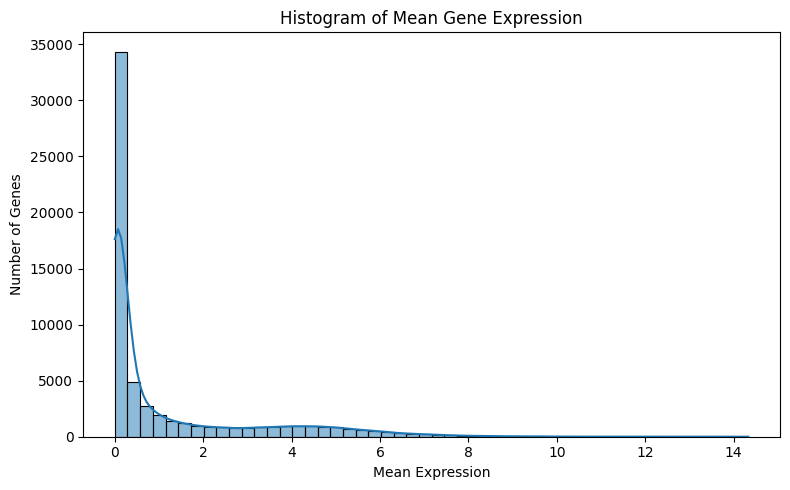

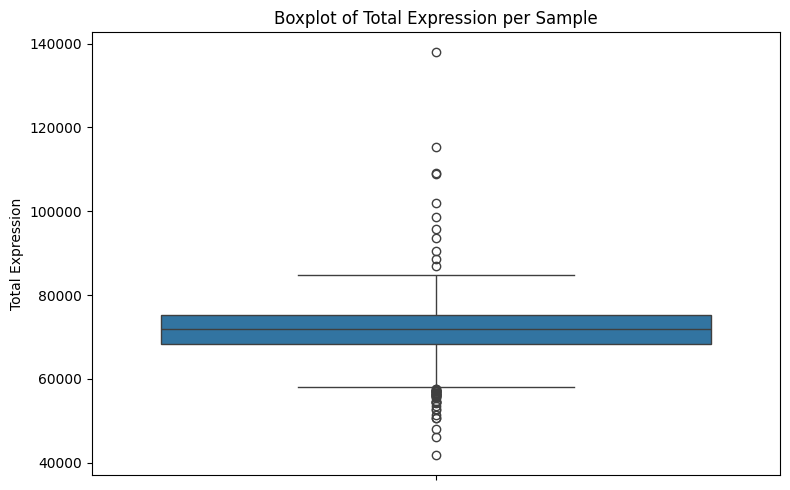

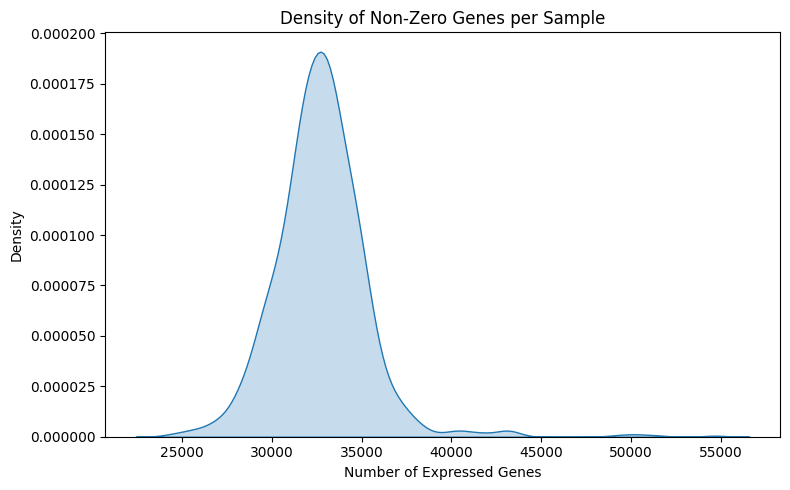

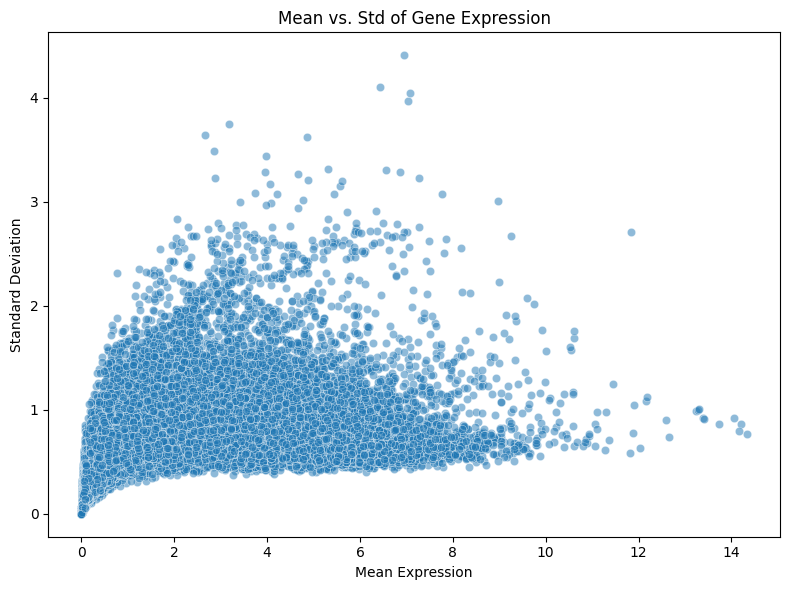

In [44]:
# Summary for genes
gene_summary = pd.DataFrame({
    'mean': genes_only.mean(),
    'std': genes_only.std()
})

# Summary for samples
sample_summary = pd.DataFrame({
    'sum_expr': genes_only.sum(axis=1),
    'mean_expr': genes_only.mean(axis=1),
    'non_zero_genes': (genes_only > 0).sum(axis=1)
})

# Histogram of Mean Gene Expression
plt.figure(figsize=(8, 5))
sns.histplot(gene_summary['mean'], bins=50, kde=True)
plt.title('Histogram of Mean Gene Expression')
plt.xlabel('Mean Expression')
plt.ylabel('Number of Genes')
plt.tight_layout()
plt.show()

# Boxplot of Total Expression per Sample
plt.figure(figsize=(8, 5))
sns.boxplot(y=sample_summary['sum_expr'])
plt.title('Boxplot of Total Expression per Sample')
plt.ylabel('Total Expression')
plt.tight_layout()
plt.show()

# Density Plot of Number of Non-Zero Genes per Sample
plt.figure(figsize=(8, 5))
sns.kdeplot(sample_summary['non_zero_genes'], fill=True)
plt.title('Density of Non-Zero Genes per Sample')
plt.xlabel('Number of Expressed Genes')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# Scatterplot of Mean vs. Standard Deviation for Genes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=gene_summary, x='mean', y='std', alpha=0.5)
plt.title('Mean vs. Std of Gene Expression')
plt.xlabel('Mean Expression')
plt.ylabel('Standard Deviation')
plt.tight_layout()
plt.show()


MISSING VALUES

annotations.samples                                          1203
days_to_sample_procurement.samples                           1200
annotation_id.annotations                                    1172
case_submitter_id.annotations                                1172
status.annotations                                           1172
state.annotations                                            1172
case_id.annotations                                          1172
updated_datetime.annotations                                 1172
entity_type.annotations                                      1172
category.annotations                                         1172
created_datetime.annotations                                 1172
classification.annotations                                   1172
submitter_id.annotations                                     1172
notes.annotations                                            1172
entity_submitter_id.annotations                              1172
entity_id.

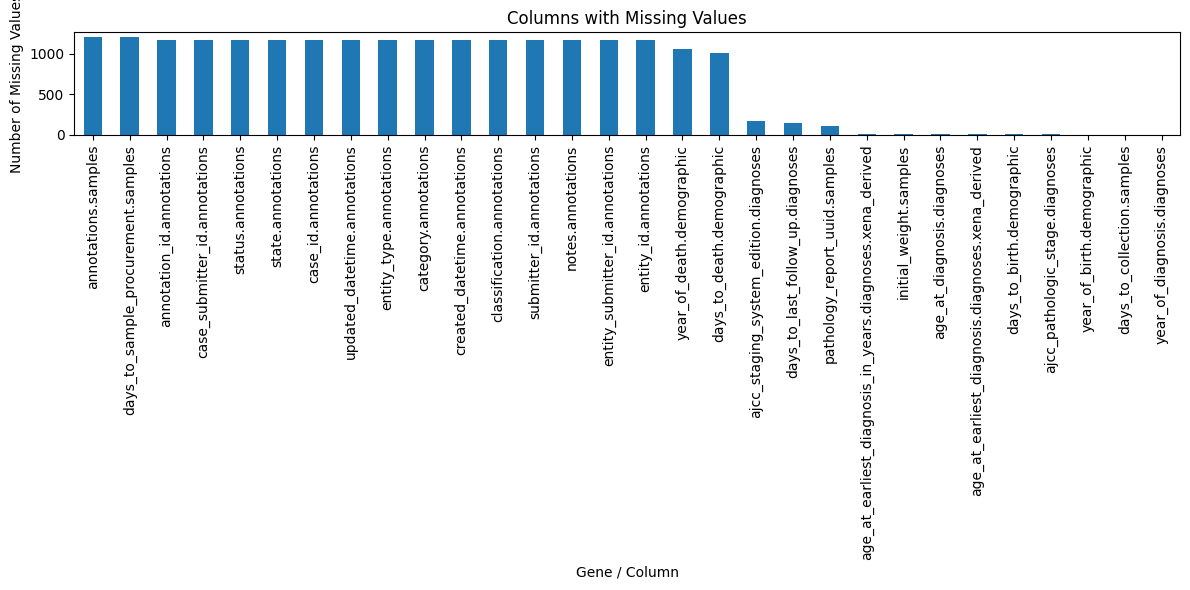

In [45]:
# Get missing value counts per column
missing_values = breast_combined_df.isna().sum()
missing_values = missing_values[missing_values > 0]

# Sort missing values in descending order (optional)
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

# Plot the missing values counts per column
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title("Columns with Missing Values")
plt.ylabel("Number of Missing Values")
plt.xlabel("Gene / Column")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [46]:
# ---------------------------
# 2. Drop Unnecessary Columns
# ---------------------------

# Drop all columns that end with '.annotations'
breast_combined_df = breast_combined_df.drop(
    columns=[col for col in breast_combined_df.columns if col.endswith('.annotations')]
)

# Drop ID-like columns (those containing 'uuid', 'submitter_id', 'entity_', or 'case_id')
id_like_cols = [
    col for col in breast_combined_df.columns 
    if 'uuid' in col or 'submitter_id' in col or 'entity_' in col or 'case_id' in col
]
breast_combined_df = breast_combined_df.drop(columns=id_like_cols)



In [47]:
# ---------------------------
# 3. Process 'days_to_death.demographic'
# ---------------------------

# Count the number of zeros in the 'days_to_death.demographic' column
zero_count = (breast_combined_df['days_to_death.demographic'] == 0).sum()
print(f"Number of zeros in 'days_to_death.demographic': {zero_count}")

# Check for null values in 'days_to_death.demographic' where patients are marked as 'Alive'
null_and_alive = breast_combined_df[
    breast_combined_df['days_to_death.demographic'].isnull() & 
    (breast_combined_df['vital_status.demographic'] == 'Alive')
]
null_and_alive_count = null_and_alive.shape[0]
print(f"Number of null values in 'days_to_death.demographic' corresponding to 'Alive': {null_and_alive_count}")

# Fill null values in 'days_to_death.demographic' with 0 for patients who are alive
breast_combined_df.loc[
    breast_combined_df['days_to_death.demographic'].isnull() & 
    (breast_combined_df['vital_status.demographic'] == 'Alive'),
    'days_to_death.demographic'
] = 0


Number of zeros in 'days_to_death.demographic': 0
Number of null values in 'days_to_death.demographic' corresponding to 'Alive': 1006



# 4. Missing Values 


In [48]:
# Get updated missing value counts per column after the fill
missing_values = breast_combined_df.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

annotations.samples                                          1203
days_to_sample_procurement.samples                           1200
year_of_death.demographic                                    1060
ajcc_staging_system_edition.diagnoses                         174
days_to_last_follow_up.diagnoses                              143
days_to_birth.demographic                                      15
age_at_diagnosis.diagnoses                                     15
age_at_earliest_diagnosis.diagnoses.xena_derived               15
age_at_earliest_diagnosis_in_years.diagnoses.xena_derived      15
initial_weight.samples                                         15
ajcc_pathologic_stage.diagnoses                                12
year_of_birth.demographic                                       3
year_of_diagnosis.diagnoses                                     2
days_to_collection.samples                                      2
days_to_death.demographic                                       1
dtype: int

In [49]:
cols_to_drop = ['year_of_death.demographic', 'annotations.samples' ,'days_to_sample_procurement.samples']
breast_combined_df = breast_combined_df.drop(columns=cols_to_drop)
# Check for missing values again        
missing_values = breast_combined_df.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

ajcc_staging_system_edition.diagnoses                        174
days_to_last_follow_up.diagnoses                             143
days_to_birth.demographic                                     15
age_at_diagnosis.diagnoses                                    15
age_at_earliest_diagnosis.diagnoses.xena_derived              15
age_at_earliest_diagnosis_in_years.diagnoses.xena_derived     15
initial_weight.samples                                        15
ajcc_pathologic_stage.diagnoses                               12
year_of_birth.demographic                                      3
year_of_diagnosis.diagnoses                                    2
days_to_collection.samples                                     2
days_to_death.demographic                                      1
dtype: int64


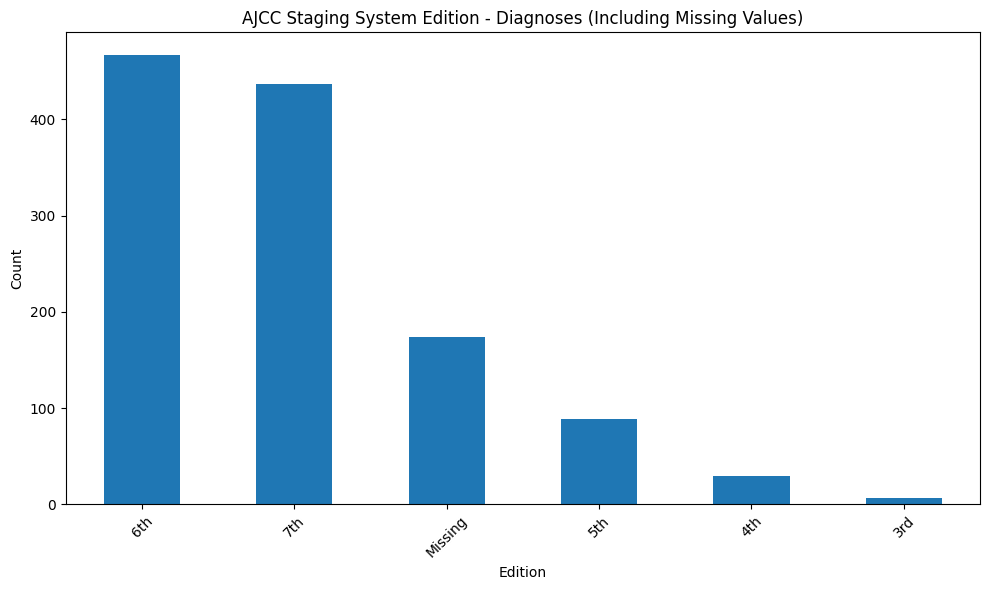

In [50]:
# Include NaNs in the value counts
value_counts = breast_combined_df['ajcc_staging_system_edition.diagnoses'].value_counts(dropna=False)

# Replace NaN with a label for plotting
value_counts.index = value_counts.index.fillna('Missing')

# Plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('AJCC Staging System Edition - Diagnoses (Including Missing Values)')
plt.xlabel('Edition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
# Add a New Category for "Missing"
breast_combined_df['ajcc_staging_system_edition.diagnoses'] = breast_combined_df['ajcc_staging_system_edition.diagnoses'].fillna('Missing')
# this is just the edition, we'll drop this 

In [52]:
breast_combined_df = breast_combined_df.drop(columns=[
    'days_to_last_follow_up.diagnoses',
    'days_to_birth.demographic',
    'ajcc_staging_system_edition.diagnoses'
])


In [53]:
# Create a DataFrame without columns that start with 'ENSG'
no_gene_breast_df = breast_combined_df.loc[:, ~breast_combined_df.columns.str.startswith('ENSG')]
no_gene_breast_df.head()

,sample,OS.time,OS,_PATIENT,id,disease_type,primary_site,alcohol_history.exposures,race.demographic,gender.demographic,...,sample_id.samples,sample_type.samples,composition.samples,days_to_collection.samples,initial_weight.samples,preservation_method.samples,oct_embedded.samples,specimen_type.samples,is_ffpe.samples,tissue_type.samples
0,TCGA-D8-A146-01A,643.0,0,TCGA-D8-A146,03da7a65-fa2f-42cb-a709-5fe8736f21d3,Ductal and Lobular Neoplasms,Breast,Not Reported,white,female,...,e8232960-f69e-4491-9cf0-ed7bdcf20031,Primary Tumor,Not Reported,221.0,230.0,Unknown,False,Solid Tissue,False,Tumor
1,TCGA-AQ-A0Y5-01A,172.0,1,TCGA-AQ-A0Y5,d0b78f3f-a198-437a-ab8c-204345d3b75d,Ductal and Lobular Neoplasms,Breast,Not Reported,white,female,...,f5675b71-ed1b-4fdb-be07-d627dc98ed88,Primary Tumor,Not Reported,212.0,160.0,Unknown,False,Solid Tissue,False,Tumor
2,TCGA-C8-A274-01A,508.0,0,TCGA-C8-A274,dbcad60f-86c7-41e3-b0ae-baa39c9f83dd,Ductal and Lobular Neoplasms,Breast,Not Reported,asian,female,...,7a3cd962-7512-4797-864a-cf374b5cb385,Primary Tumor,Not Reported,163.0,470.0,OCT,True,Solid Tissue,False,Tumor
3,TCGA-BH-A0BD-01A,554.0,0,TCGA-BH-A0BD,b379bfb8-284e-4300-8325-85cfd6809cb8,Ductal and Lobular Neoplasms,Breast,Not Reported,white,female,...,832b8766-0e59-4ad4-b4c9-1e39b2ce4fb1,Primary Tumor,Not Reported,364.0,90.0,OCT,True,Solid Tissue,False,Tumor
4,TCGA-B6-A1KC-01B,1326.0,0,TCGA-B6-A1KC,1502c7d7-1535-4e56-9f34-30623acd50d5,Ductal and Lobular Neoplasms,Breast,Not Reported,white,female,...,018b2eaa-216b-4726-a26e-ac726f4b47d3,Primary Tumor,Not Reported,2781.0,50.0,OCT,True,Solid Tissue,False,Tumor


In [54]:
#let's impute age_at_diagnosis.diagnoses with age_at_earliest_diagnosis_in_years.diagnoses.xena_derived
breast_combined_df['age_at_diagnosis.diagnoses'] = breast_combined_df['age_at_diagnosis.diagnoses'].fillna(
    breast_combined_df['age_at_index.demographic']
)
# Check for missing values in 'age_at_diagnosis.diagnoses' after imputation     
missing_values = breast_combined_df.isna().sum()
missing_values = missing_values[missing_values > 0] 
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

age_at_earliest_diagnosis.diagnoses.xena_derived             15
age_at_earliest_diagnosis_in_years.diagnoses.xena_derived    15
initial_weight.samples                                       15
ajcc_pathologic_stage.diagnoses                              12
year_of_birth.demographic                                     3
year_of_diagnosis.diagnoses                                   2
days_to_collection.samples                                    2
days_to_death.demographic                                     1
dtype: int64


In [55]:
#let's impute age_at_diagnosis.diagnoses with age_at_earliest_diagnosis_in_years.diagnoses.xena_derived
breast_combined_df['age_at_earliest_diagnosis.diagnoses.xena_derived'] = breast_combined_df['age_at_earliest_diagnosis.diagnoses.xena_derived'].fillna(
    breast_combined_df['age_at_index.demographic']
)
breast_combined_df['age_at_earliest_diagnosis_in_years.diagnoses.xena_derived'] = breast_combined_df['age_at_earliest_diagnosis_in_years.diagnoses.xena_derived'].fillna(
    breast_combined_df['age_at_index.demographic']
)

# Check for missing values in 'age_at_diagnosis.diagnoses' after imputation     
missing_values = breast_combined_df.isna().sum()
missing_values = missing_values[missing_values > 0] 
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

initial_weight.samples             15
ajcc_pathologic_stage.diagnoses    12
year_of_birth.demographic           3
year_of_diagnosis.diagnoses         2
days_to_collection.samples          2
days_to_death.demographic           1
dtype: int64


In [56]:
#impute initial_weight.samples   using the median
breast_combined_df['initial_weight.samples'] = breast_combined_df['initial_weight.samples'].fillna(
    breast_combined_df['initial_weight.samples'].median()
)

In [57]:
# Step 1: Define your inference function
def infer_pathologic_stage(row):
    t = row['ajcc_pathologic_t.diagnoses']
    n = row['ajcc_pathologic_n.diagnoses']
    m = row['ajcc_pathologic_m.diagnoses']

    # If any of the components are missing, return NaN
    if pd.isna(t) or pd.isna(n) or pd.isna(m):
        return np.nan

    # Stage IV: metastatic
    if m == 'M1':
        return 'Stage IV'

    # Basic rule-based inference (you can customize these)
    if t == 'T1' and n == 'N0':
        return 'Stage I'
    elif t in ['T1', 'T2'] and n in ['N0', 'N1']:
        return 'Stage II'
    elif t in ['T2', 'T3'] and n in ['N1', 'N2']:
        return 'Stage III'
    elif n in ['N2', 'N3']:
        return 'Stage III'
    else:
        return 'Unknown'

# Step 2: Apply only where stage is missing
mask = breast_combined_df['ajcc_pathologic_stage.diagnoses'].isna()

breast_combined_df.loc[mask, 'ajcc_pathologic_stage.diagnoses'] = breast_combined_df[mask].apply(
    infer_pathologic_stage, axis=1
)

# Check for missing values in 'age_at_diagnosis.diagnoses' after imputation     
missing_values = breast_combined_df.isna().sum()
missing_values = missing_values[missing_values > 0] 
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

year_of_birth.demographic      3
year_of_diagnosis.diagnoses    2
days_to_collection.samples     2
days_to_death.demographic      1
dtype: int64


In [58]:
# Impute missing year_of_birth using age_at_index
breast_combined_df['year_of_birth.demographic'] = breast_combined_df['year_of_birth.demographic'].fillna(
    2010 - breast_combined_df['age_at_index.demographic']
)
breast_combined_df['year_of_diagnosis.diagnoses'] = breast_combined_df['year_of_diagnosis.diagnoses'].fillna(2009)
median_days = breast_combined_df['days_to_collection.samples'].median()

breast_combined_df['days_to_collection.samples'] = breast_combined_df['days_to_collection.samples'].fillna(median_days)


In [59]:
no_gene_breast_df = breast_combined_df.loc[:, ~breast_combined_df.columns.str.startswith('ENSG')]
no_gene_breast_df.head()

,sample,OS.time,OS,_PATIENT,id,disease_type,primary_site,alcohol_history.exposures,race.demographic,gender.demographic,...,sample_id.samples,sample_type.samples,composition.samples,days_to_collection.samples,initial_weight.samples,preservation_method.samples,oct_embedded.samples,specimen_type.samples,is_ffpe.samples,tissue_type.samples
0,TCGA-D8-A146-01A,643.0,0,TCGA-D8-A146,03da7a65-fa2f-42cb-a709-5fe8736f21d3,Ductal and Lobular Neoplasms,Breast,Not Reported,white,female,...,e8232960-f69e-4491-9cf0-ed7bdcf20031,Primary Tumor,Not Reported,221.0,230.0,Unknown,False,Solid Tissue,False,Tumor
1,TCGA-AQ-A0Y5-01A,172.0,1,TCGA-AQ-A0Y5,d0b78f3f-a198-437a-ab8c-204345d3b75d,Ductal and Lobular Neoplasms,Breast,Not Reported,white,female,...,f5675b71-ed1b-4fdb-be07-d627dc98ed88,Primary Tumor,Not Reported,212.0,160.0,Unknown,False,Solid Tissue,False,Tumor
2,TCGA-C8-A274-01A,508.0,0,TCGA-C8-A274,dbcad60f-86c7-41e3-b0ae-baa39c9f83dd,Ductal and Lobular Neoplasms,Breast,Not Reported,asian,female,...,7a3cd962-7512-4797-864a-cf374b5cb385,Primary Tumor,Not Reported,163.0,470.0,OCT,True,Solid Tissue,False,Tumor
3,TCGA-BH-A0BD-01A,554.0,0,TCGA-BH-A0BD,b379bfb8-284e-4300-8325-85cfd6809cb8,Ductal and Lobular Neoplasms,Breast,Not Reported,white,female,...,832b8766-0e59-4ad4-b4c9-1e39b2ce4fb1,Primary Tumor,Not Reported,364.0,90.0,OCT,True,Solid Tissue,False,Tumor
4,TCGA-B6-A1KC-01B,1326.0,0,TCGA-B6-A1KC,1502c7d7-1535-4e56-9f34-30623acd50d5,Ductal and Lobular Neoplasms,Breast,Not Reported,white,female,...,018b2eaa-216b-4726-a26e-ac726f4b47d3,Primary Tumor,Not Reported,2781.0,50.0,OCT,True,Solid Tissue,False,Tumor


In [60]:
missing_death_rows = no_gene_breast_df[no_gene_breast_df['days_to_death.demographic'].isna()]
print(missing_death_rows)
#we see she is dead so we put zero
#let's fill the missing values in 'days_to_death.demographic' with 0 for patients who are dead
breast_combined_df.loc[
    breast_combined_df['days_to_death.demographic'].isna() & 
    (breast_combined_df['vital_status.demographic'] == 'Dead'),
    'days_to_death.demographic'
] = 0

               sample  OS.time  OS      _PATIENT                                    id                  disease_type primary_site alcohol_history.exposures race.demographic gender.demographic  ...                     sample_id.samples sample_type.samples  composition.samples  days_to_collection.samples initial_weight.samples preservation_method.samples oct_embedded.samples specimen_type.samples is_ffpe.samples tissue_type.samples
766  TCGA-E9-A245-01A     26.0   1  TCGA-E9-A245  8218119a-f68b-4ea7-9ee4-5e2edc2ae342  Ductal and Lobular Neoplasms       Breast              Not Reported            white             female  ...  dc85267a-0ce1-439e-9ecf-e5a13ad06f26       Primary Tumor         Not Reported                        62.0                  490.0                         OCT                 True          Solid Tissue           False               Tumor

[1 rows x 64 columns]


In [61]:
missing_values = breast_combined_df.isna().sum()
missing_values = missing_values[missing_values > 0] 
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

Series([], dtype: int64)


----------------------------------------

Now we need to transform the categorical variables

In [62]:
no_gene_breast_df = breast_combined_df.loc[:, ~breast_combined_df.columns.str.startswith('ENSG')]
no_gene_breast_df

,sample,OS.time,OS,_PATIENT,id,disease_type,primary_site,alcohol_history.exposures,race.demographic,gender.demographic,...,sample_id.samples,sample_type.samples,composition.samples,days_to_collection.samples,initial_weight.samples,preservation_method.samples,oct_embedded.samples,specimen_type.samples,is_ffpe.samples,tissue_type.samples
0,TCGA-D8-A146-01A,643.0,0,TCGA-D8-A146,03da7a65-fa2f-42cb-a709-5fe8736f21d3,Ductal and Lobular Neoplasms,Breast,Not Reported,white,female,...,e8232960-f69e-4491-9cf0-ed7bdcf20031,Primary Tumor,Not Reported,221.0,230.0,Unknown,False,Solid Tissue,False,Tumor
1,TCGA-AQ-A0Y5-01A,172.0,1,TCGA-AQ-A0Y5,d0b78f3f-a198-437a-ab8c-204345d3b75d,Ductal and Lobular Neoplasms,Breast,Not Reported,white,female,...,f5675b71-ed1b-4fdb-be07-d627dc98ed88,Primary Tumor,Not Reported,212.0,160.0,Unknown,False,Solid Tissue,False,Tumor
2,TCGA-C8-A274-01A,508.0,0,TCGA-C8-A274,dbcad60f-86c7-41e3-b0ae-baa39c9f83dd,Ductal and Lobular Neoplasms,Breast,Not Reported,asian,female,...,7a3cd962-7512-4797-864a-cf374b5cb385,Primary Tumor,Not Reported,163.0,470.0,OCT,True,Solid Tissue,False,Tumor
3,TCGA-BH-A0BD-01A,554.0,0,TCGA-BH-A0BD,b379bfb8-284e-4300-8325-85cfd6809cb8,Ductal and Lobular Neoplasms,Breast,Not Reported,white,female,...,832b8766-0e59-4ad4-b4c9-1e39b2ce4fb1,Primary Tumor,Not Reported,364.0,90.0,OCT,True,Solid Tissue,False,Tumor
4,TCGA-B6-A1KC-01B,1326.0,0,TCGA-B6-A1KC,1502c7d7-1535-4e56-9f34-30623acd50d5,Ductal and Lobular Neoplasms,Breast,Not Reported,white,female,...,018b2eaa-216b-4726-a26e-ac726f4b47d3,Primary Tumor,Not Reported,2781.0,50.0,OCT,True,Solid Tissue,False,Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,TCGA-BH-A0EI-01A,1926.0,0,TCGA-BH-A0EI,22b35927-1c3f-4f98-ba42-deafc56b677a,Ductal and Lobular Neoplasms,Breast,Not Reported,white,female,...,4a4d5c63-8e41-487d-839a-f68f28ab9b82,Primary Tumor,Not Reported,541.0,240.0,OCT,True,Solid Tissue,False,Tumor
1199,TCGA-E2-A1IO-01A,1855.0,0,TCGA-E2-A1IO,71fc8941-4cfb-47ea-a533-873d38f8c95c,Ductal and Lobular Neoplasms,Breast,Not Reported,white,female,...,de6d4267-c1cb-4761-a539-5f83368735af,Primary Tumor,Not Reported,416.0,70.0,Unknown,False,Solid Tissue,False,Tumor
1200,TCGA-E2-A15R-01A,1732.0,0,TCGA-E2-A15R,33b7bf50-53f4-4839-aa83-9665f85671d8,Ductal and Lobular Neoplasms,Breast,Not Reported,white,female,...,7295d5c2-d7bc-4d35-bdcb-17c4ec5e5de0,Primary Tumor,Not Reported,247.0,140.0,Unknown,False,Solid Tissue,False,Tumor
1201,TCGA-B6-A0IP-01A,3926.0,1,TCGA-B6-A0IP,1402082d-25c9-4148-8a1e-f58450b706bb,Ductal and Lobular Neoplasms,Breast,Not Reported,white,female,...,6b1c8010-d4fe-40e7-8e09-7a7dbdde6616,Primary Tumor,Not Reported,4565.0,80.0,OCT,True,Solid Tissue,False,Tumor


We drop the columns that are not needed: sample, _PATIENT, id, primary_site, alcohol_history.exposures, gender.demographic, primary_site.project, project_id.project, disease_type.project, name.project, name.program.project, project.tissue_source_site, bcr_id.tissue_source_site, days_to_diagnosis.diagnoses, last_known_disease_status.diagnoses, age_at_diagnosis.diagnoses, morphology.diagnoses, classification_of_tumor.diagnoses, icd_10_code.diagnoses, site_of_resection_or_biopsy.diagnoses, tumor_grade.diagnoses, progression_or_recurrence.diagnoses, age_at_earliest_diagnosis.diagnoses.xena_derived, treatment_id.treatments.diagnoses, treatment_type.treatments.diagnoses, created_datetime.treatments.diagnoses, updated_datetime.treatments.diagnoses, state.treatments.diagnoses, sample_id.samples, composition.samples, preservation_method.samples, specimen_type.samples, 


dropping but to reconsdier tissue_source_site_id.tis, code.tissue_source_site, name.tissue_source_site, tissue_or_organ_of_origin.diagnoses, primary_diagnosis.diagnoses, ajcc_staging_system_edition.diagnoses, sample_type_id.samples


dont know what to do ajcc_pathologic_stage.diagnoses: is it our y??

In [63]:
columns_to_drop = [
    'sample', '_PATIENT', 'id', 'primary_site', 'alcohol_history.exposures', 'gender.demographic',
    'primary_site.project', 'project_id.project', 'disease_type.project', 'name.project',
    'name.program.project', 'project.tissue_source_site', 'bcr_id.tissue_source_site',
    'days_to_diagnosis.diagnoses', 'last_known_disease_status.diagnoses',
    'age_at_diagnosis.diagnoses', 'morphology.diagnoses',
    'classification_of_tumor.diagnoses', 'icd_10_code.diagnoses',
    'site_of_resection_or_biopsy.diagnoses', 'tumor_grade.diagnoses',
    'progression_or_recurrence.diagnoses',
    'age_at_earliest_diagnosis.diagnoses.xena_derived', 'treatment_id.treatments.diagnoses',
    'treatment_type.treatments.diagnoses', 'created_datetime.treatments.diagnoses',
    'updated_datetime.treatments.diagnoses', 'state.treatments.diagnoses',
    'sample_id.samples', 'composition.samples', 'preservation_method.samples',
    'specimen_type.samples', 'tissue_source_site_id.tis', 'code.tissue_source_site',
    'name.tissue_source_site', 'tissue_or_organ_of_origin.diagnoses',
    'primary_diagnosis.diagnoses', 'ajcc_staging_system_edition.diagnoses',
    'sample_type_id.samples', 'tissue_source_site_id.tissue_source_site'
]

# Drop only columns that exist in the dataframe
breast_combined_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [64]:
breast_combined_df['disease_type'].unique()

array(['Ductal and Lobular Neoplasms', 'Epithelial Neoplasms, NOS',
       'Cystic, Mucinous and Serous Neoplasms',
       'Fibroepithelial Neoplasms',
       'Adnexal and Skin Appendage Neoplasms',
       'Adenomas and Adenocarcinomas', 'Complex Epithelial Neoplasms',
       'Squamous Cell Neoplasms', 'Basal Cell Neoplasms'], dtype=object)

In [65]:
#disease_type is almost binary, so we do Binary Encoding
# Binary encode: 1 if 'Ductal and Lobular Neoplasms', else 0
breast_combined_df['is_ductal_lobular'] = (
    breast_combined_df['disease_type'] == 'Ductal and Lobular Neoplasms'
).astype(int)

# Drop the original column
breast_combined_df = breast_combined_df.drop(columns=['disease_type'])


In [66]:
# One-hot encode race.demographic
race_dummies = pd.get_dummies(breast_combined_df['race.demographic'], prefix='race', drop_first=True)

# Concatenate the new dummy columns
breast_combined_df = pd.concat([breast_combined_df, race_dummies], axis=1)

# Drop the original column
breast_combined_df = breast_combined_df.drop(columns=['race.demographic'])


In [67]:
# one hot encoding of ethnicity.demographic
# One-hot encode with drop_first=True
ethnicity_dummies = pd.get_dummies(breast_combined_df['ethnicity.demographic'], 
                                    prefix='ethnicity', 
                                    drop_first=True)

# Add the new columns to the DataFrame
breast_combined_df = pd.concat([breast_combined_df, ethnicity_dummies], axis=1)

# Drop the original column
breast_combined_df = breast_combined_df.drop(columns=['ethnicity.demographic'])


In [68]:
# Binary encode: 1 if 'Alive', 0 if 'Dead'
breast_combined_df['is_alive'] = (
    breast_combined_df['vital_status.demographic'] == 'Alive'
).astype(int)

# Drop the original column
breast_combined_df.drop(columns=['vital_status.demographic'], inplace=True)


In [69]:
# Binary encode: 1 if 'Not Reported', 0 if 'No'
breast_combined_df['synchronous_malignancy_reported'] = (
    breast_combined_df['synchronous_malignancy.diagnoses'] == 'Not Reported'
).astype(int)

# Drop the original column
breast_combined_df = breast_combined_df.drop(columns=['synchronous_malignancy.diagnoses'])


In [70]:
def encode_prior_malignancy(value):
    if value == 'yes':
        return 1
    elif value == 'no':
        return 0
    else:
        return -1  # or use -1 if your model supports it

breast_combined_df['prior_malignancy_encoded'] = breast_combined_df['prior_malignancy.diagnoses'].apply(encode_prior_malignancy)
breast_combined_df = breast_combined_df.drop(columns=['prior_malignancy.diagnoses'])


In [71]:
def encode_prior_treatment(value):
    if value == 'Yes':
        return 1
    elif value == 'No':
        return 0
    else:
        return -1

breast_combined_df['prior_treatment_encoded'] = breast_combined_df['prior_treatment.diagnoses'].apply(encode_prior_treatment)

# Drop the original column
breast_combined_df = breast_combined_df.drop(columns=['prior_treatment.diagnoses'])


In [74]:
breast_combined_df['ajcc_pathologic_n.diagnoses'].value_counts()

ajcc_pathologic_n.diagnoses
N0           359
N1a          187
N0 (i-)      169
N1           136
N2a           69
N2            63
N3a           48
N1b           46
N1mi          42
N0 (i+)       28
N3            28
NX            19
N1c            4
N3b            3
N0 (mol+)      1
N3c            1
Name: count, dtype: int64

In [73]:
breast_combined_df['ajcc_pathologic_m.diagnoses'].value_counts()

ajcc_pathologic_m.diagnoses
M0          1001
MX           171
M1            24
cM0 (i+)       7
Name: count, dtype: int64

In [39]:
# we try to encode them together ajcc_pathologic_t.diagnoses, ajcc_pathologic_n.diagnoses, ajcc_pathologic_m.diagnoses
def simplify_t(value):
    if pd.isna(value): return 'Unknown'
    if value.startswith('T1'): return 'T1'
    if value.startswith('T2'): return 'T2'
    if value.startswith('T3'): return 'T3'
    if value.startswith('T4'): return 'T4'
    return value  # keep T0, TX, etc.

breast_combined_df['T_grouped'] = breast_combined_df['ajcc_pathologic_t.diagnoses'].apply(simplify_t)

def simplify_n(value):
    if pd.isna(value): return 'Unknown'
    if value.startswith('N0'): return 'N0'
    if value.startswith('N1'): return 'N1'
    if value.startswith('N2'): return 'N2'
    if value.startswith('N3'): return 'N3'
    return value

breast_combined_df['N_grouped'] = breast_combined_df['ajcc_pathologic_n.diagnoses'].apply(simplify_n)

def simplify_m(value):
    if pd.isna(value): return 'Unknown'
    if value == 'M0': return 'M0'
    if value == 'M1': return 'M1'
    return 'Other'

breast_combined_df['M_grouped'] = breast_combined_df['ajcc_pathologic_m.diagnoses'].apply(simplify_m)

tmn_dummies = pd.get_dummies(
    breast_combined_df[['T_grouped', 'N_grouped', 'M_grouped']], 
    drop_first=True
)

# Add to df and drop originals
breast_combined_df = pd.concat([breast_combined_df, tmn_dummies], axis=1)
breast_combined_df = breast_combined_df.drop(columns=[
    'ajcc_pathologic_t.diagnoses',
    'ajcc_pathologic_n.diagnoses',
    'ajcc_pathologic_m.diagnoses',
    'T_grouped', 'N_grouped', 'M_grouped'
])


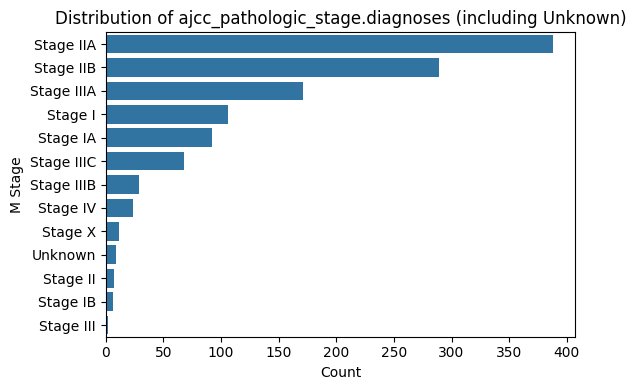

In [40]:
# Plot AJCC Pathologic Stage (ordinal categorical)
plt.figure(figsize=(6, 4))
sns.countplot(
    y=breast_combined_df['ajcc_pathologic_stage.diagnoses'].fillna('Unknown'),
    order=breast_combined_df['ajcc_pathologic_stage.diagnoses'].fillna('Unknown').value_counts().index
)
plt.title("Distribution of ajcc_pathologic_stage.diagnoses (including Unknown)")
plt.xlabel("Count")
plt.ylabel("M Stage")
plt.tight_layout()
plt.show()

In [41]:
breast_combined_df = breast_combined_df[breast_combined_df['ajcc_pathologic_stage.diagnoses'] != 'Unknown']


In [42]:
# Step 1: Convert string representations of lists to actual Python lists
breast_combined_df['treatment_or_therapy.treatments.diagnoses'] = breast_combined_df['treatment_or_therapy.treatments.diagnoses'].apply(ast.literal_eval)

# Step 2: Split into two new columns
breast_combined_df[['treatment_flag', 'diagnosis_flag']] = pd.DataFrame(
    breast_combined_df['treatment_or_therapy.treatments.diagnoses'].tolist(),
    index=breast_combined_df.index
)

# Step 3: Map values: 'yes' → 1, 'no' → 0, 'not reported' → -1
mapping = {'yes': 1, 'no': 0, 'not reported': -1}

breast_combined_df['treatment_flag_encoded'] = breast_combined_df['treatment_flag'].map(mapping)
breast_combined_df['diagnosis_flag_encoded'] = breast_combined_df['diagnosis_flag'].map(mapping)

# Drop original column if not needed
breast_combined_df.drop(columns=['treatment_or_therapy.treatments.diagnoses'], inplace=True)


In [43]:
# Mapping categories to numeric values
mapping = {'yes': 1, 'no': 0, 'not reported': -1}

# Apply mapping
breast_combined_df['treatment_flag'] = breast_combined_df['treatment_flag'].map(mapping)
breast_combined_df['diagnosis_flag'] = breast_combined_df['diagnosis_flag'].map(mapping)


In [44]:
# One-hot encode the 'tumor_descriptor.samples' column
tumor_dummies = pd.get_dummies(
    breast_combined_df['tumor_descriptor.samples'],
    prefix='tumor_sample',
    drop_first=True
)

# Concatenate the new columns with the original DataFrame
breast_combined_df = pd.concat([breast_combined_df, tumor_dummies], axis=1)

# Drop the original column if no longer needed
breast_combined_df.drop(columns=['tumor_descriptor.samples'], inplace=True)


In [45]:
# One-hot encode the 'sample_type.samples' column with drop_first=True
sample_type_dummies = pd.get_dummies(
    breast_combined_df['sample_type.samples'],
    prefix='sample_type',
    drop_first=True
)

# Concatenate the new dummy columns to the original DataFrame
breast_combined_df = pd.concat([breast_combined_df, sample_type_dummies], axis=1)

# Drop the original 'sample_type.samples' column
breast_combined_df.drop(columns=['sample_type.samples'], inplace=True)


In [46]:
# Convert boolean to int and store in a new column
breast_combined_df['oct_embedded_encoded'] = breast_combined_df['oct_embedded.samples'].astype(int)

# Drop the original column
breast_combined_df.drop(columns=['oct_embedded.samples'], inplace=True)


In [47]:
# Convert True/False to 1/0
breast_combined_df['is_ffpe_encoded'] = breast_combined_df['is_ffpe.samples'].astype(int)

# Drop the original column
breast_combined_df.drop(columns=['is_ffpe.samples'], inplace=True)


In [48]:
# One-hot encode 'tissue_type.samples' and drop the first category
tissue_type_dummies = pd.get_dummies(
    breast_combined_df['tissue_type.samples'],
    prefix='tissue_type',
    drop_first=True
)

# Concatenate the new dummy column to the DataFrame
breast_combined_df = pd.concat([breast_combined_df, tissue_type_dummies], axis=1)

# Drop the original column
breast_combined_df.drop(columns=['tissue_type.samples'], inplace=True)


In [49]:
# Check for non-numeric columns
non_numeric_columns = breast_combined_df.select_dtypes(exclude=['number']).columns
print("\nNon-numeric (categorical or object) columns:")
print(non_numeric_columns.tolist())



Non-numeric (categorical or object) columns:
['ajcc_pathologic_stage.diagnoses', 'race_asian', 'race_black or african american', 'race_not reported', 'race_white', 'ethnicity_not hispanic or latino', 'ethnicity_not reported', 'T_grouped_T2', 'T_grouped_T3', 'T_grouped_T4', 'T_grouped_TX', 'N_grouped_N1', 'N_grouped_N2', 'N_grouped_N3', 'N_grouped_NX', 'M_grouped_M1', 'M_grouped_Other', 'tumor_sample_Not Applicable', 'tumor_sample_Primary', 'sample_type_Primary Tumor', 'sample_type_Solid Tissue Normal', 'tissue_type_Tumor']


In [ ]:
cols_to_convert = [
    'race_asian', 'race_black or african american', 'race_not reported', 'race_white',
    'ethnicity_not hispanic or latino', 'ethnicity_not reported',
    'T_grouped_T2', 'T_grouped_T3', 'T_grouped_T4', 'T_grouped_TX',
    'N_grouped_N1', 'N_grouped_N2', 'N_grouped_N3', 'N_grouped_NX',
    'M_grouped_M1', 'M_grouped_Other',
    'tumor_sample_Not Applicable', 'tumor_sample_Primary',
    'sample_type_Primary Tumor', 'sample_type_Solid Tissue Normal',
    'tissue_type_Tumor'
]

# Convert True/False to 1/0
breast_combined_df[cols_to_convert] = breast_combined_df[cols_to_convert].astype(int)

In [51]:
no_gene_breast_df = breast_combined_df.loc[:, ~breast_combined_df.columns.str.startswith('ENSG')]
no_gene_breast_df

,OS.time,OS,age_at_index.demographic,year_of_birth.demographic,days_to_death.demographic,ajcc_pathologic_stage.diagnoses,year_of_diagnosis.diagnoses,age_at_earliest_diagnosis_in_years.diagnoses.xena_derived,days_to_collection.samples,initial_weight.samples,...,diagnosis_flag,treatment_flag_encoded,diagnosis_flag_encoded,tumor_sample_Not Applicable,tumor_sample_Primary,sample_type_Primary Tumor,sample_type_Solid Tissue Normal,oct_embedded_encoded,is_ffpe_encoded,tissue_type_Tumor
0,643.0,0,57.0,1953.0,0.0,Stage IIA,2010.0,57.153425,221.0,230.0,...,1,0,1,0,1,1,0,0,0,1
1,172.0,1,70.0,1940.0,172.0,Stage IIIA,2010.0,70.665753,212.0,160.0,...,1,0,1,0,1,1,0,0,0,1
2,508.0,0,63.0,1947.0,0.0,Stage IIA,2010.0,63.936986,163.0,470.0,...,0,1,0,0,1,1,0,1,0,1
3,554.0,0,47.0,1962.0,0.0,Stage IIA,2009.0,47.328767,364.0,90.0,...,1,1,1,0,1,1,0,1,0,1
4,1326.0,0,67.0,1936.0,0.0,Stage IIB,2003.0,67.920548,2781.0,50.0,...,1,1,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,1926.0,0,51.0,1957.0,0.0,Stage IIA,2008.0,51.345205,541.0,240.0,...,1,0,1,0,1,1,0,1,0,1
1199,1855.0,0,37.0,1972.0,0.0,Stage I,2009.0,37.454795,416.0,70.0,...,1,1,1,0,1,1,0,0,0,1
1200,1732.0,0,64.0,1946.0,0.0,Stage IIA,2010.0,64.575342,247.0,140.0,...,1,1,1,0,1,1,0,0,0,1
1201,3926.0,1,74.0,1923.0,3926.0,Stage IA,1997.0,74.101370,4565.0,80.0,...,0,0,0,0,1,1,0,1,0,1


-----------------------------------------

## Regression

Now we will use three variables as our y: 
1. Binary Classification: is_alive, 'Alive': 1, 'Dead': 0
2. Regression (or Ordinal Classification): ajcc_pathologic_stage.diagnoses, Stage IIA (32%), Stage IIB (24%), etc
3. Regression Continuous numerical: days_to_death

We will model the analysis first using only Gene expression variables, and then we'll analyse the full dataset

In total we'll have 6 regressions 

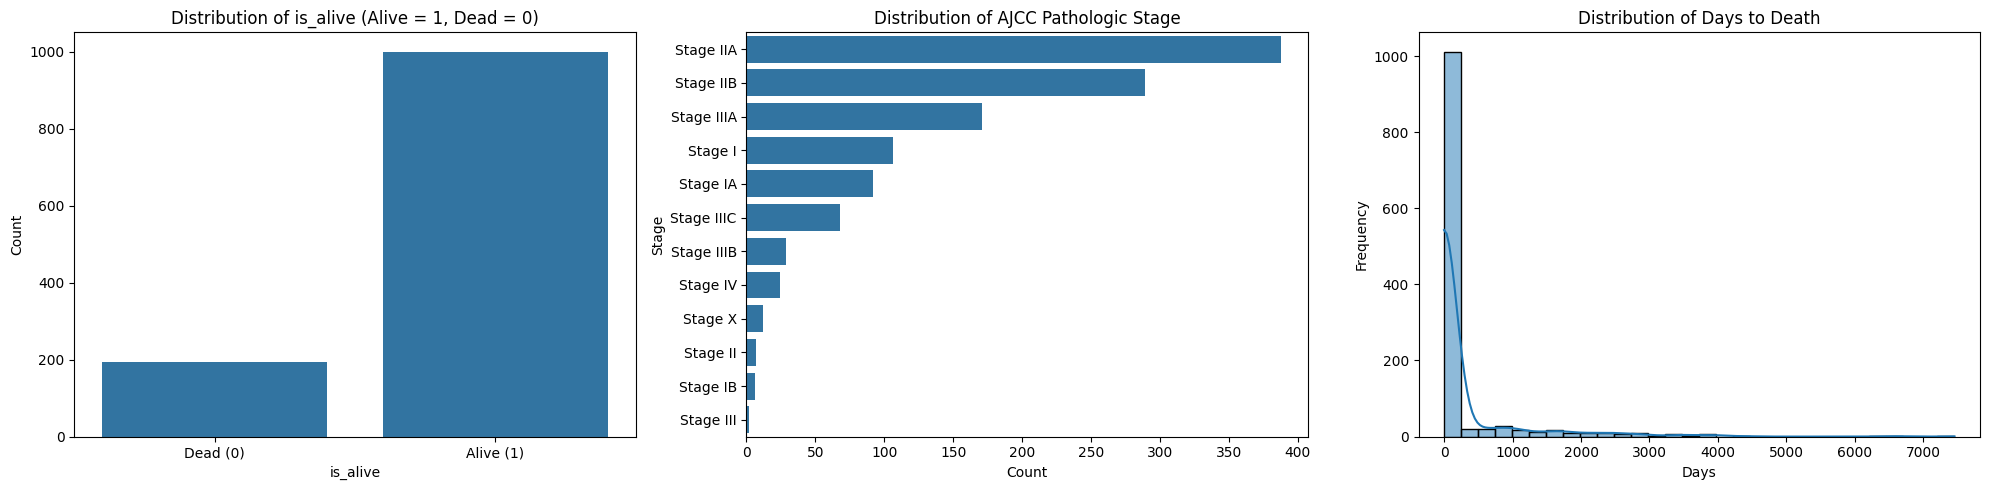

In [52]:
# Set up figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot 1: is_alive (binary)
sns.countplot(x='is_alive', data=breast_combined_df, ax=axs[0])
axs[0].set_title('Distribution of is_alive (Alive = 1, Dead = 0)')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Dead (0)', 'Alive (1)'])
axs[0].set_ylabel('Count')

# Plot 2: AJCC Pathologic Stage (ordinal categorical)
sns.countplot(
    y='ajcc_pathologic_stage.diagnoses',
    data=breast_combined_df,
    order=breast_combined_df['ajcc_pathologic_stage.diagnoses'].value_counts().index,
    ax=axs[1]
)
axs[1].set_title('Distribution of AJCC Pathologic Stage')
axs[1].set_ylabel('Stage')
axs[1].set_xlabel('Count')

# Plot 3: Days to Death (continuous)
sns.histplot(
    breast_combined_df['days_to_death.demographic'].dropna(),
    kde=True,
    bins=30,
    ax=axs[2]
)
axs[2].set_title('Distribution of Days to Death')
axs[2].set_xlabel('Days')
axs[2].set_ylabel('Frequency')

# Layout
plt.tight_layout()
plt.show()

## Target Variable Analysis: Distribution and Modeling Considerations

We analyze the three target variables used in our regression and classification models: `is_alive`, `ajcc_pathologic_stage.diagnoses`, and `days_to_death`. Each has different characteristics and challenges.

---

### 1. `is_alive` (Binary Classification)

**Distribution**:  
- Alive: ~1000  
- Dead: ~200  

**Issues**:
- Class imbalance can negatively affect model performance.
- A model could trivially predict "Alive" and achieve high accuracy.
- Accuracy becomes a misleading metric due to imbalance.

**Recommendations**:
- Use metrics such as AUC, F1-score, precision, and recall.
- Apply class weighting, oversampling (e.g., SMOTE), or undersampling strategies to address imbalance.

---

### 2. `ajcc_pathologic_stage.diagnoses` (Ordinal Categorical)

**Distribution**:  
- Dominated by a few stages: Stage IIA, IIB, IIIA  
- Sparse categories: Stage IB, Stage X, Unknown, etc.

**Issues**:
- The ordinal nature of the data is lost if treated as nominal (e.g., one-hot encoding).
- Rare categories may cause instability in training.
- Clinical progression between stages may not be linear.

**Recommendations**:
- Use ordinal encoding based on clinical progression (e.g., Stage I = 1, ..., Stage IV = 4).
- Consider merging rare categories.
- Explore ordinal regression models if supported by the framework.

ajcc_pathologic_t.diagnoses, n, m
These are the individual TNM components:

T = Tumor size and extent (e.g., T1, T2, T3, T4)

N = Lymph node involvement (e.g., N0, N1, N2, N3)

M = Distant metastasis (M0 = no, M1 = yes)

They provide granular staging detail, they represent part of the diagnose, so we **should consider dropping the 3 cols**

---

### 3. `days_to_death` (Continuous Regression)

**Distribution**:  
- Highly right-skewed  
- Most values are small; some extend to 7000+ days

**Issues**:
- Right-skewness violates normality assumptions in linear regression.
- Outliers may dominate loss functions.
- Alive patients are likely censored and excluded, reducing training data and introducing survival bias.

**Recommendations**:
- Apply a log transformation (e.g., `log1p`) to stabilize variance and reduce skew:
  ```python
  breast_combined_df['log_days_to_death'] = np.log1p(breast_combined_df['days_to_death'])

In [ ]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Gene features
genes_only = breast_combined_df.loc[:, breast_combined_df.columns.str.startswith('ENSG')]

# ------------------------------------
# 1. is_alive — Logistic Regression (L1)
# ------------------------------------
X1 = genes_only
y1 = breast_combined_df['is_alive']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Scale and fit logistic regression with L1 penalty
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1_train)

clf1 = LogisticRegression(penalty='l1', solver='saga', max_iter=10000, C=1.0)
clf1.fit(X1_scaled, y1_train)

# Get non-zero coefficients
selected_genes_1 = X1.columns[clf1.coef_[0] != 0]
print("1. Genes selected for is_alive (binary classification):")
print(selected_genes_1.tolist())


: 

: 

In [ ]:

# ------------------------------------
# 2. ajcc_pathologic_stage.diagnoses — Ordinal regression via Lasso
# ------------------------------------
stage_order = ['Stage I', 'Stage IA', 'Stage IB', 'Stage II', 'Stage IIA', 'Stage IIB',
               'Stage III', 'Stage IIIA', 'Stage IIIB', 'Stage IIIC', 'Stage IV']
mask2 = breast_combined_df['ajcc_pathologic_stage.diagnoses'].isin(stage_order)

X2 = genes_only[mask2]
y2 = breast_combined_df.loc[mask2, 'ajcc_pathologic_stage.diagnoses']
y2_encoded = OrdinalEncoder(categories=[stage_order]).fit_transform(y2.values.reshape(-1, 1)).ravel()

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2_encoded, test_size=0.2, random_state=42)

scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2_train)

lasso2 = Lasso(alpha=0.1)
lasso2.fit(X2_scaled, y2_train)

selected_genes_2 = X2.columns[lasso2.coef_ != 0]
print("\n2. Genes selected for AJCC pathologic stage (ordinal regression):")
print(selected_genes_2.tolist())



In [ ]:

# ------------------------------------
# 3. days_to_death — Lasso regression
# ------------------------------------
mask3 = breast_combined_df['days_to_death'].notna()
X3 = genes_only[mask3]
y3 = breast_combined_df.loc[mask3, 'days_to_death']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3_train)

lasso3 = Lasso(alpha=0.1)
lasso3.fit(X3_scaled, y3_train)

selected_genes_3 = X3.columns[lasso3.coef_ != 0]
print("\n3. Genes selected for days_to_death (continuous regression):")
print(selected_genes_3.tolist())